In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\HP\Documents\Haritha\Honor_project\final\new\diabetes.csv')

In [4]:
print("Basic Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.5

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nZero Value Counts:")
print(df[zero_columns].eq(0).sum())


Zero Value Counts:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [7]:
# Replacing zero values with the median of the respective columns
for col in zero_columns:
    median_value = df[col].replace(0, np.nan).median()
    df[col] = df[col].replace(0, median_value)

In [8]:
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nZero Value Counts:")
print(df[zero_columns].eq(0).sum())


Zero Value Counts:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


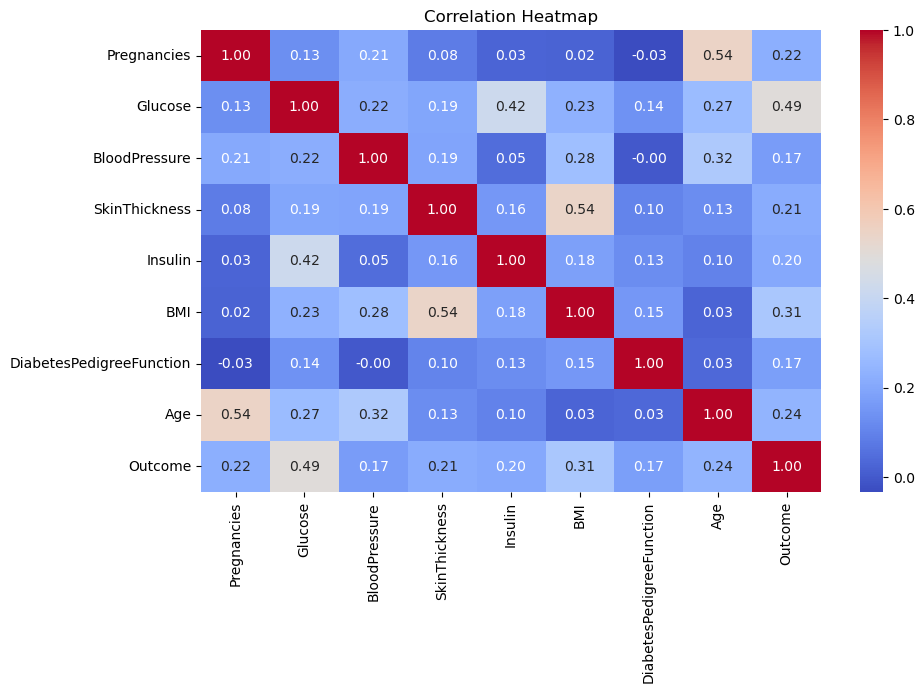

In [9]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

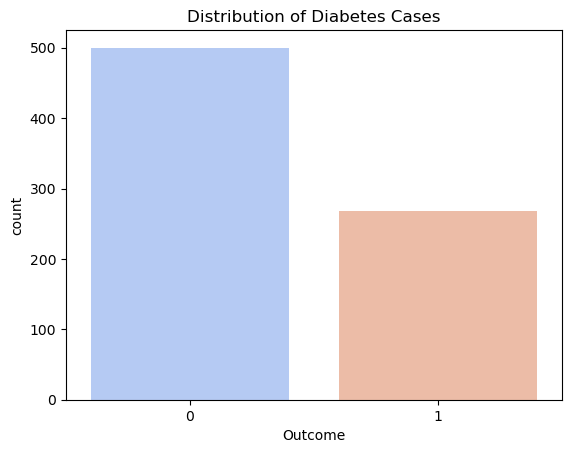

In [10]:
# Distribution of target variable
sns.countplot(x='Outcome', data=df, palette='coolwarm')
plt.title('Distribution of Diabetes Cases')
plt.show()

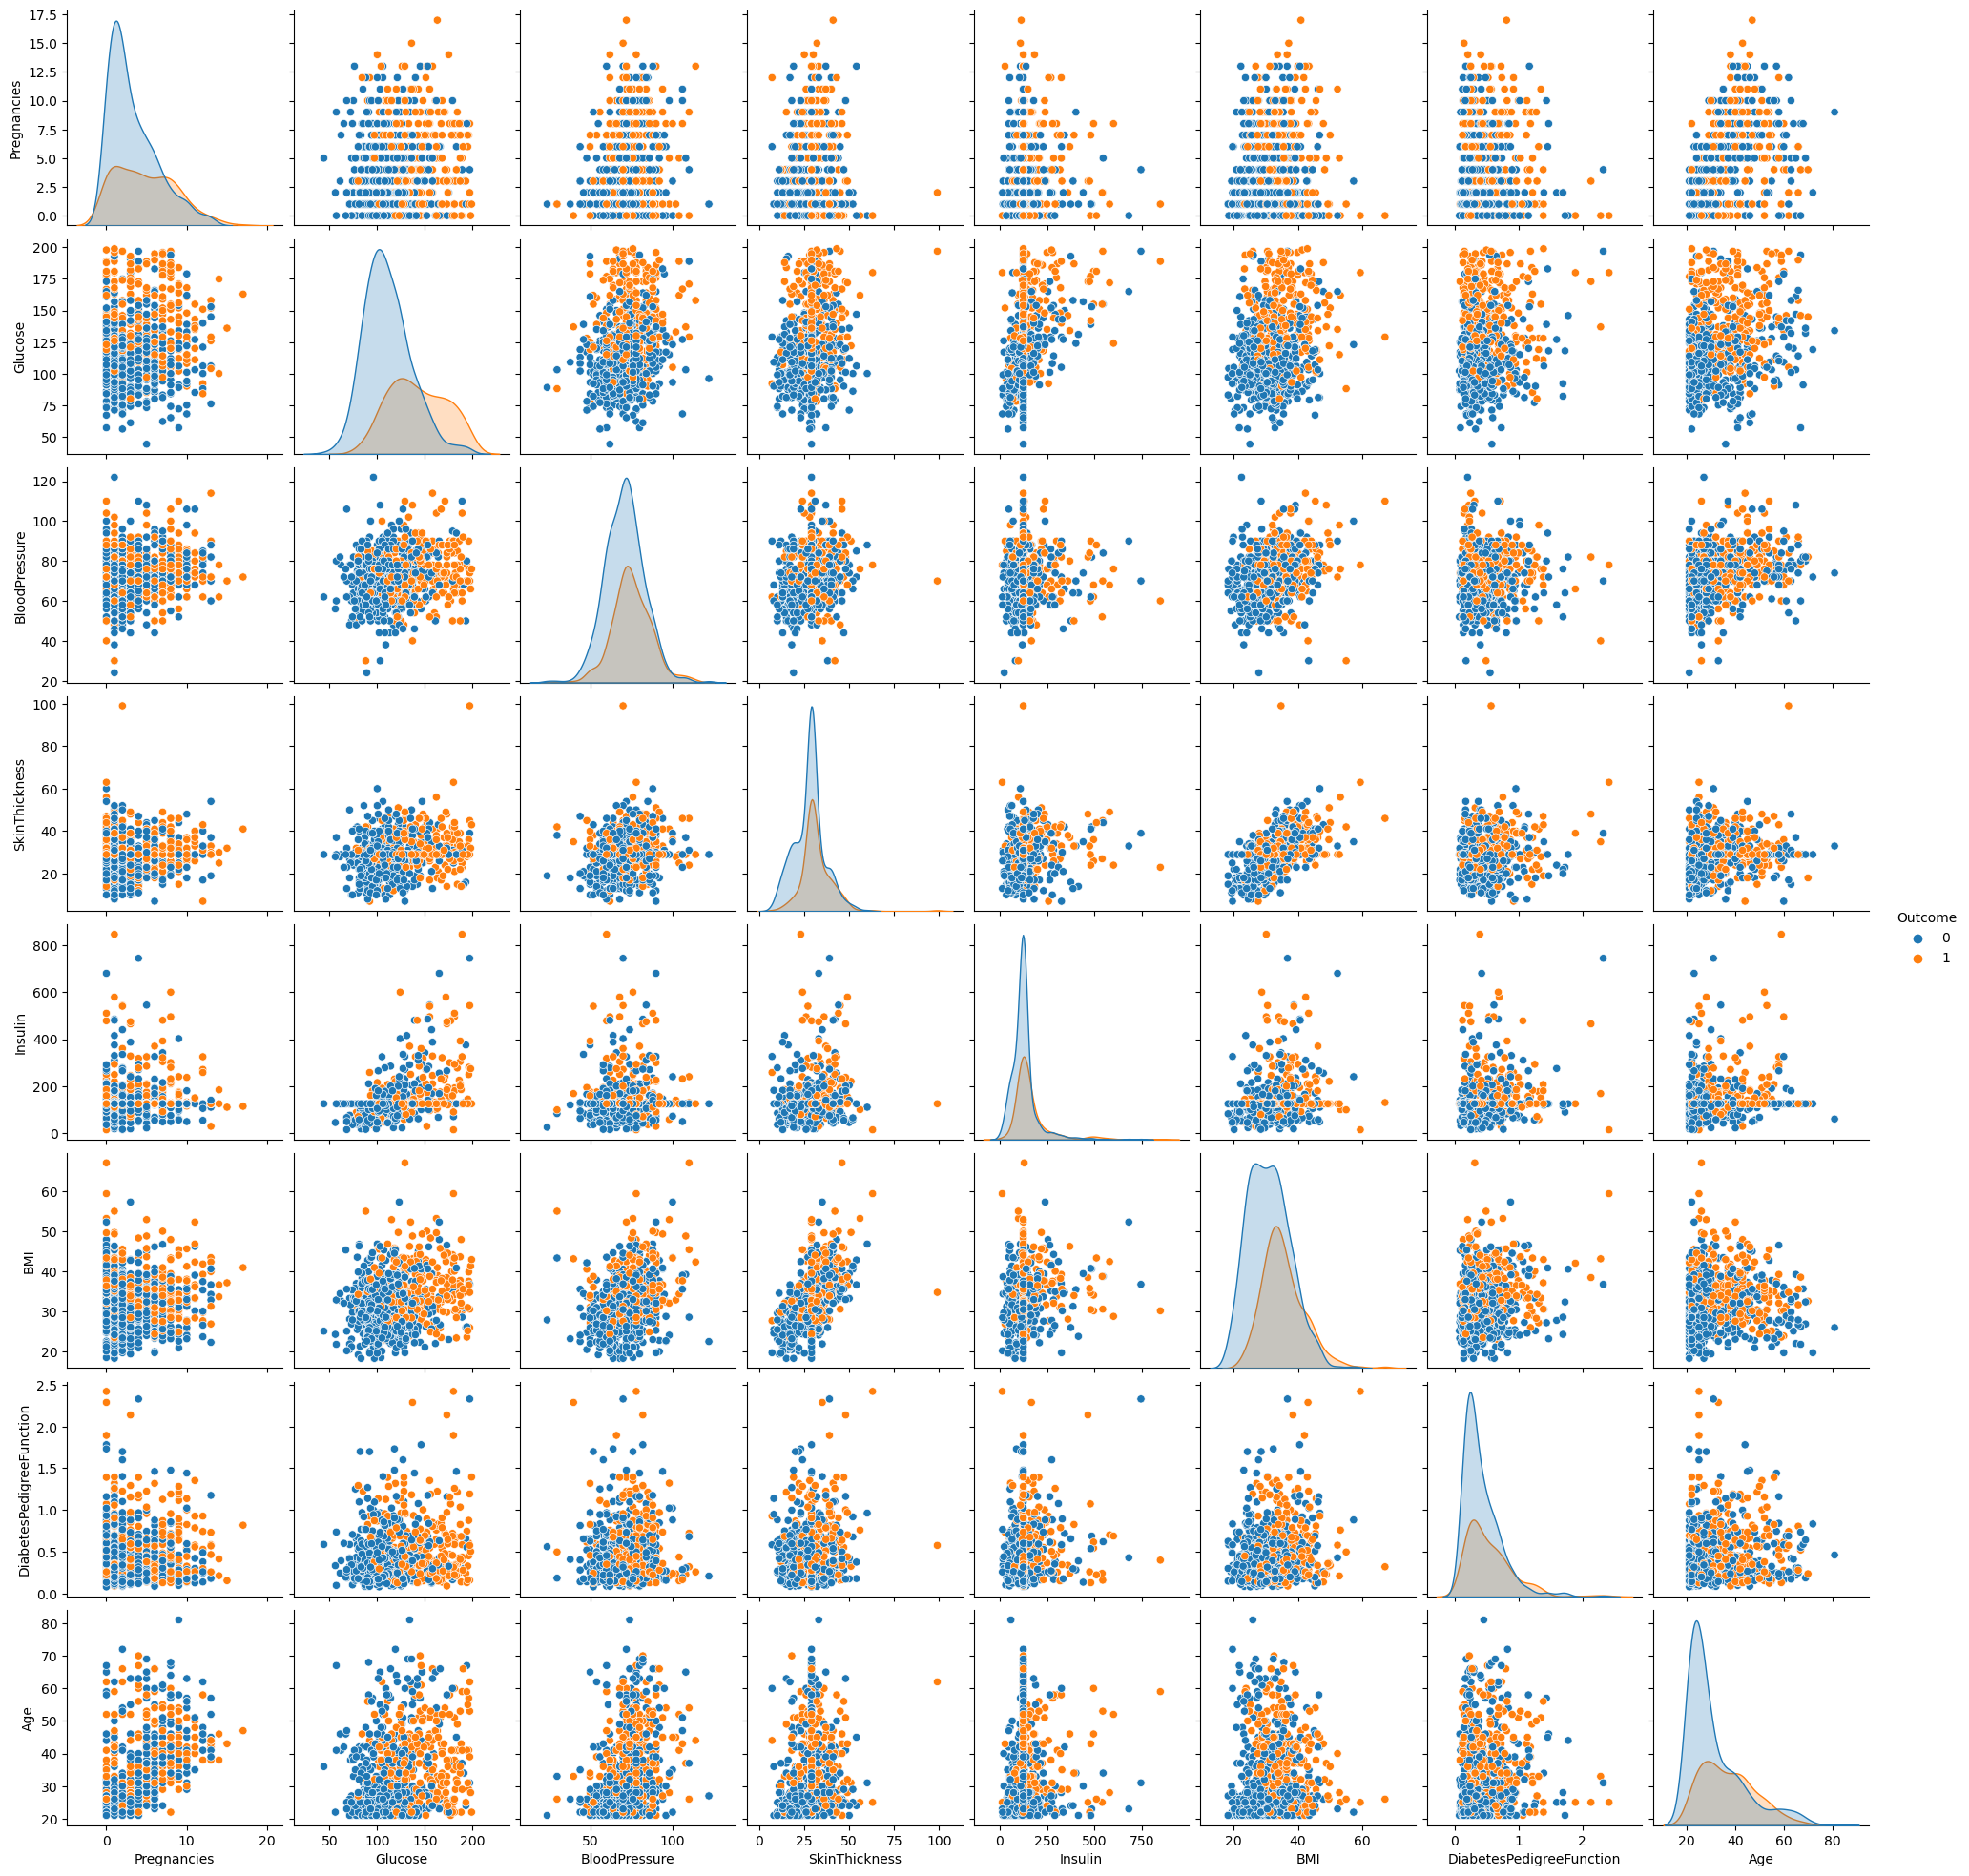

In [11]:

# Pairplot to visualize relationships
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

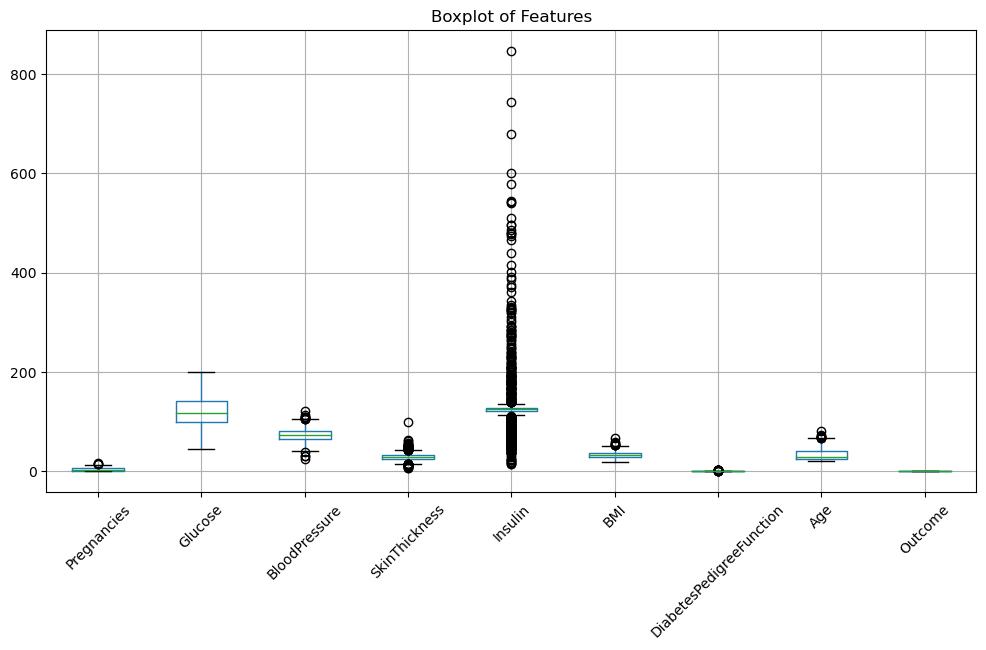

In [12]:
# Boxplots to check for outliers
plt.figure(figsize=(12,6))
df.boxplot(rot=45)
plt.title('Boxplot of Features')
plt.show()


In [13]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

print(f"Original size: {df.shape}, After outlier removal: {df_cleaned.shape}")


Original size: (768, 9), After outlier removal: (375, 9)


In [14]:
df.shape

(768, 9)

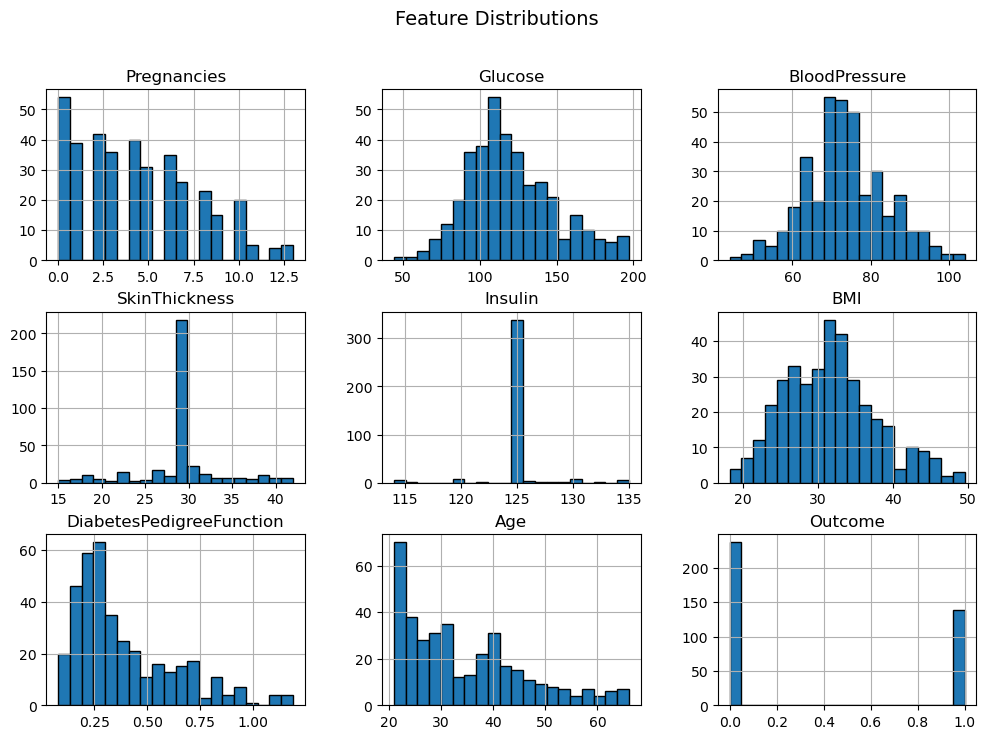

In [15]:
df_cleaned.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


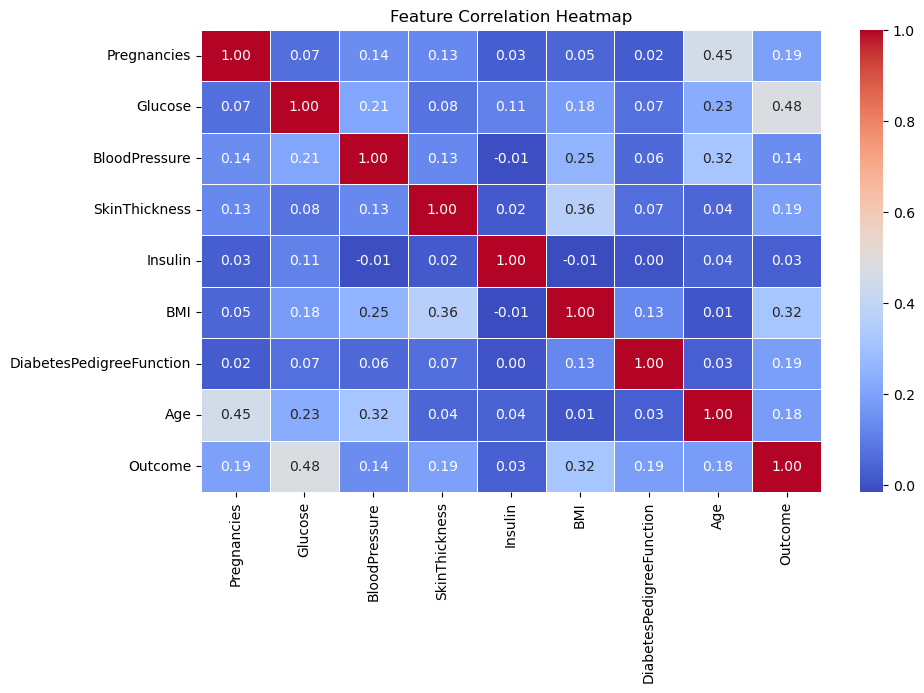

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [17]:
# Save the cleaned dataset
df_cleaned.to_csv("diabetes_cleaned.csv", index=False)

print("Cleaned dataset saved successfully!")



Cleaned dataset saved successfully!


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

# Load the cleaned dataset
df = pd.read_csv(r'C:\Users\HP\Documents\Haritha\Honor_project\final\new\diabetes_cleaned.csv')

# Define features and target
X = df.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target
y = df['Outcome']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (for models like KNN, SVM, Logistic Regression, Naïve Bayes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Naives Bayes

Naïve Bayes Accuracy: 0.7600
Naïve Bayes ROC AUC: 0.8169
Confusion Matrix:
[[39  8]
 [10 18]]


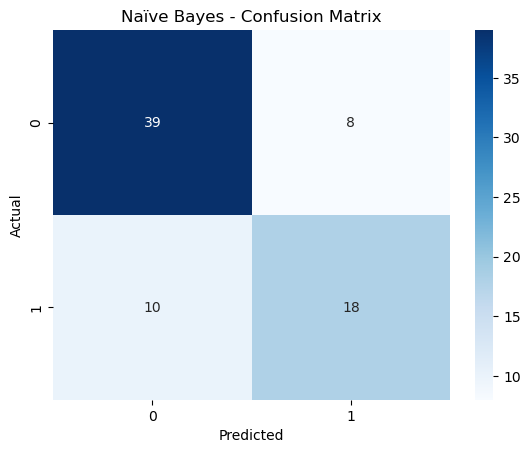

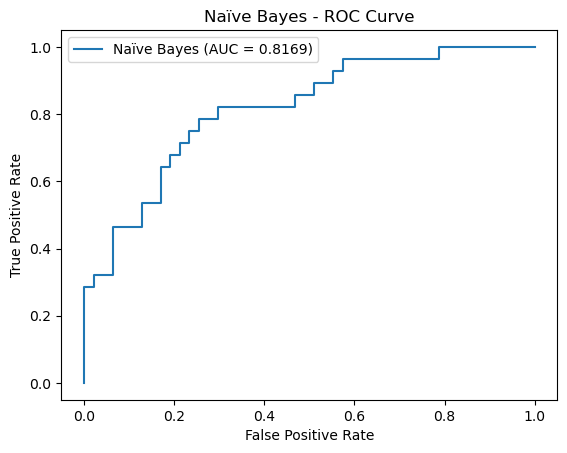

In [19]:
from sklearn.naive_bayes import GaussianNB

# Train the model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test_scaled)
y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print(f"Naïve Bayes Accuracy: {accuracy_nb:.4f}")
print(f"Naïve Bayes ROC AUC: {roc_auc_nb:.4f}")
print("Confusion Matrix:")
print(cm_nb)

# Plot Confusion Matrix
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Naïve Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_nb)
plt.plot(fpr, tpr, label=f'Naïve Bayes (AUC = {roc_auc_nb:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naïve Bayes - ROC Curve')
plt.legend()
plt.show()


LogisticRegression

Logistic Regression Accuracy: 0.7733
Logistic Regression ROC AUC: 0.8822
Confusion Matrix:
[[42  5]
 [12 16]]


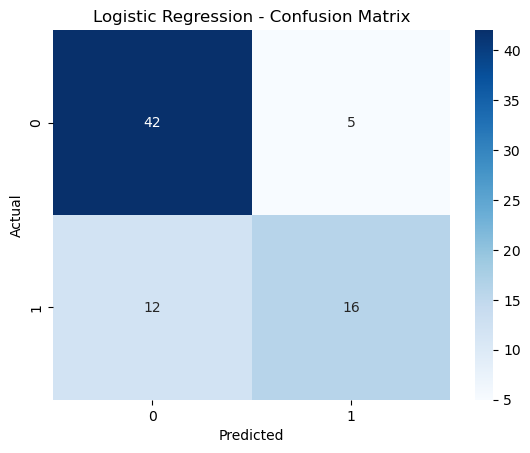

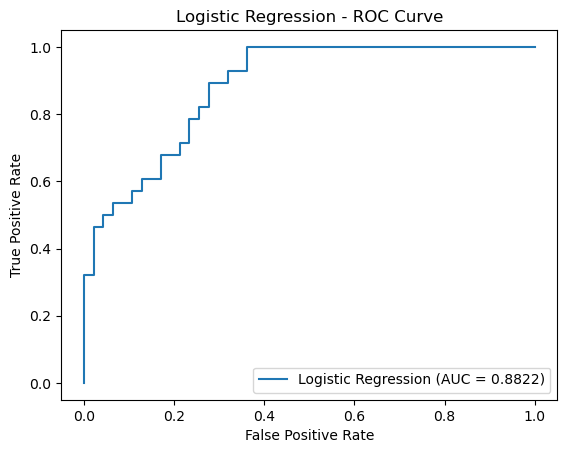

In [20]:
from sklearn.linear_model import LogisticRegression

# Train model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression ROC AUC: {roc_auc_lr:.4f}")
print("Confusion Matrix:")
print(cm_lr)

# Plot Confusion Matrix
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend()
plt.show()


Random Forest

Random Forest Accuracy: 0.7600
Random Forest ROC AUC: 0.7895
Confusion Matrix:
[[41  6]
 [12 16]]


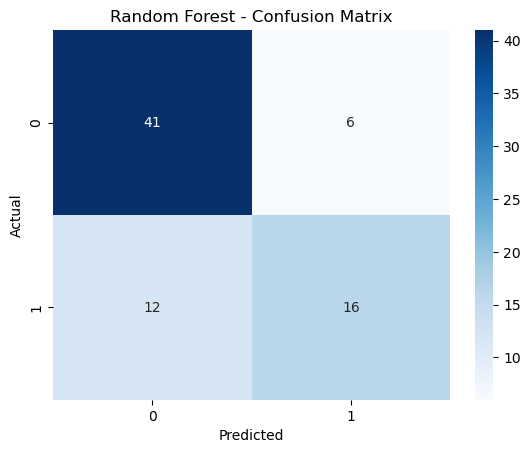

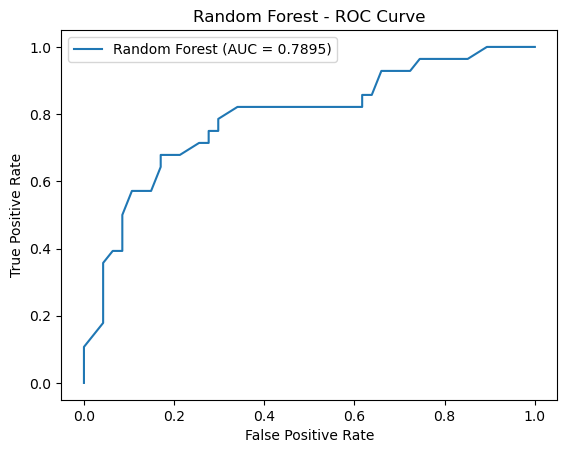

Feature Importance (Random Forest):
Glucose                     0.271216
BMI                         0.168144
DiabetesPedigreeFunction    0.137520
Age                         0.129714
BloodPressure               0.117677
Pregnancies                 0.098247
SkinThickness               0.055940
Insulin                     0.021543
dtype: float64


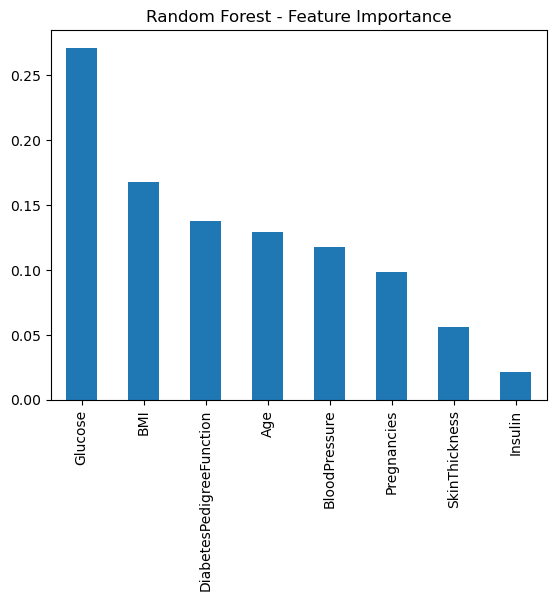

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest ROC AUC: {roc_auc_rf:.4f}")
print("Confusion Matrix:")
print(cm_rf)

# Plot Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend()
plt.show()

# Feature Importance
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance (Random Forest):")
print(feature_importance_rf)

# Plot Feature Importance
feature_importance_rf.plot(kind='bar', title="Random Forest - Feature Importance")
plt.show()


KNN

KNN Accuracy: 0.6933
KNN ROC AUC: 0.7264
Confusion Matrix:
[[37 10]
 [13 15]]


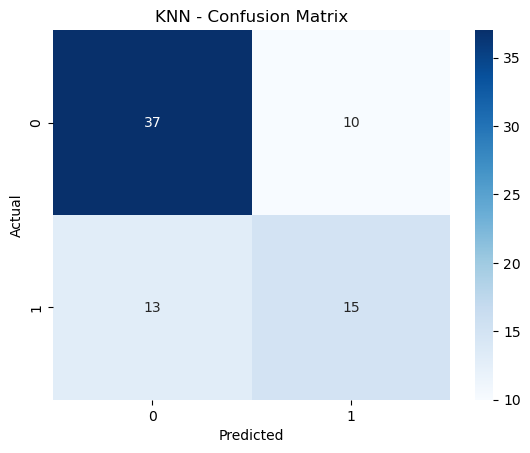

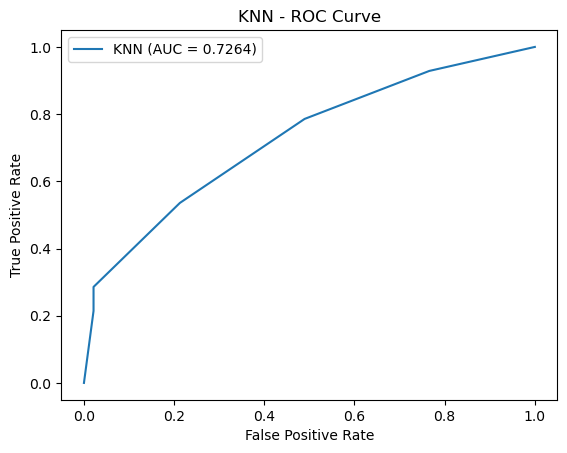

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Train model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test_scaled)
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"KNN ROC AUC: {roc_auc_knn:.4f}")
print("Confusion Matrix:")
print(cm_knn)

# Plot Confusion Matrix
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_knn:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN - ROC Curve')
plt.legend()
plt.show()


SVM

SVM Accuracy: 0.7733
SVM ROC AUC: 0.8777
Confusion Matrix:
[[42  5]
 [12 16]]


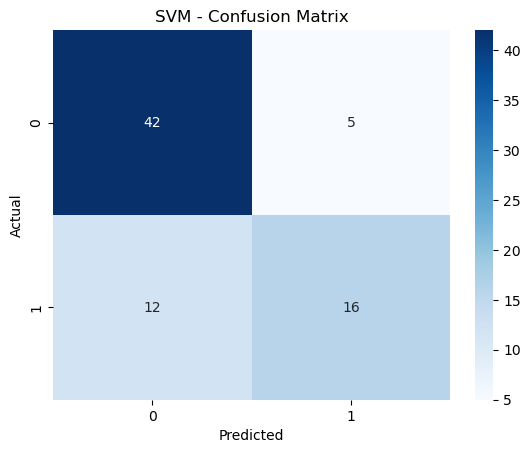

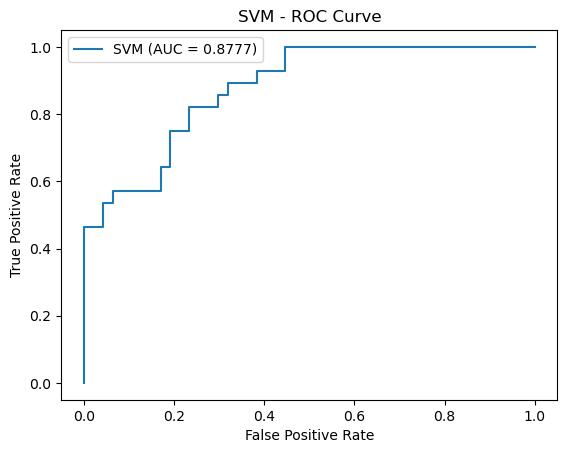

In [23]:
from sklearn.svm import SVC

# Train model
svm_model = SVC(probability=True, kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM ROC AUC: {roc_auc_svm:.4f}")
print("Confusion Matrix:")
print(cm_svm)

# Plot Confusion Matrix
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc_svm:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - ROC Curve')
plt.legend()
plt.show()


XGBoost

XGBoost Accuracy: 0.7333
XGBoost ROC AUC: 0.7690
Confusion Matrix:
[[36 11]
 [ 9 19]]


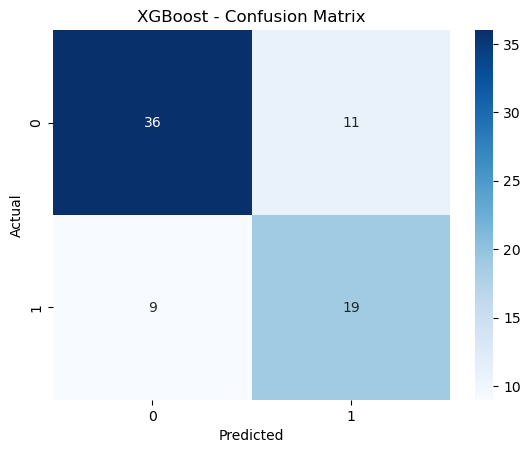

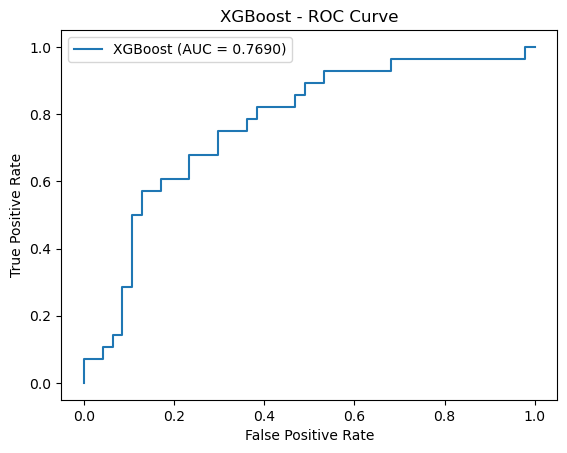

Feature Importance (XGBoost):
Glucose                     0.228057
Pregnancies                 0.133774
BMI                         0.133347
Age                         0.124174
DiabetesPedigreeFunction    0.110402
BloodPressure               0.101641
Insulin                     0.086640
SkinThickness               0.081964
dtype: float32


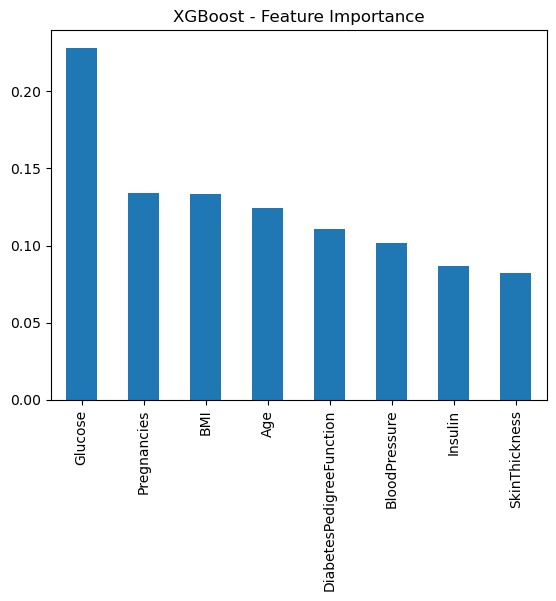

In [24]:
from xgboost import XGBClassifier

# Train model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost ROC AUC: {roc_auc_xgb:.4f}")
print("Confusion Matrix:")
print(cm_xgb)

# Plot Confusion Matrix
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - ROC Curve')
plt.legend()
plt.show()

# Feature Importance
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance (XGBoost):")
print(feature_importance_xgb)

# Plot Feature Importance
feature_importance_xgb.plot(kind='bar', title="XGBoost - Feature Importance")
plt.show()


                 Model  Accuracy   ROC AUC
1  Logistic Regression  0.773333  0.882219
4                  SVM  0.773333  0.877660
0          Naïve Bayes  0.760000  0.816869
2        Random Forest  0.760000  0.789514
5              XGBoost  0.733333  0.768997
3                  KNN  0.693333  0.726444


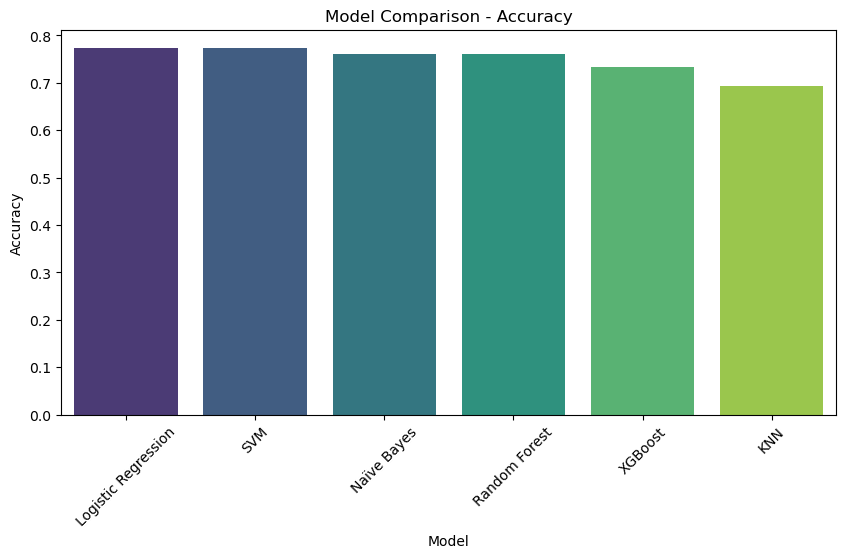

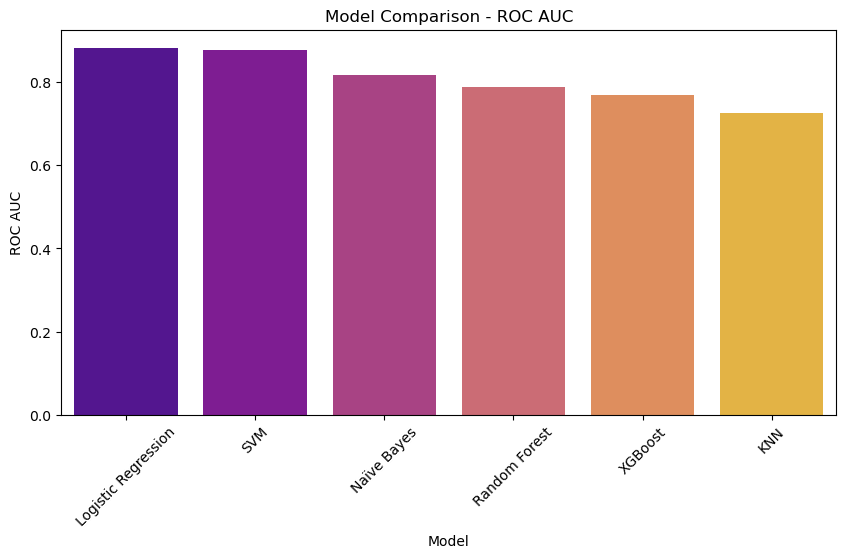

In [25]:
# Creating a summary table
results = pd.DataFrame({
    "Model": ["Naïve Bayes", "Logistic Regression", "Random Forest", "KNN", "SVM",  "XGBoost"],
    "Accuracy": [accuracy_nb, accuracy_lr, accuracy_rf, accuracy_knn, accuracy_svm,  accuracy_xgb],
    "ROC AUC": [roc_auc_nb, roc_auc_lr, roc_auc_rf, roc_auc_knn, roc_auc_svm,  roc_auc_xgb]
})

# Sort by Accuracy
results = results.sort_values(by="Accuracy", ascending=False)
print(results)

# Visualization of accuracy
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=results, palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Comparison - Accuracy")
plt.show()

# Visualization of ROC AUC
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="ROC AUC", data=results, palette="plasma")
plt.xticks(rotation=45)
plt.title("Model Comparison - ROC AUC")
plt.show()


Hyperparameter Tuning for SVM

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# GridSearchCV
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_svm.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters for SVM:", grid_svm.best_params_)
print("Best accuracy for SVM:", grid_svm.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best accuracy for SVM: 0.7333333333333334


Hyperparameter Tuning for Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers that support L1/L2 penalties
}

grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_lr.best_params_)
print("Best accuracy for Logistic Regression:", grid_lr.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy for Logistic Regression: 0.7433333333333333


In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Best SVM model from GridSearchCV
best_svm = grid_svm.best_estimator_
best_lr = grid_lr.best_estimator_

# Predictions on test data
y_pred_svm = best_svm.predict(X_test)
y_pred_lr = best_lr.predict(X_test)

# Accuracy Scores
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"SVM Test Accuracy: {accuracy_svm:.4f}")
print(f"Logistic Regression Test Accuracy: {accuracy_lr:.4f}")


SVM Test Accuracy: 0.7600
Logistic Regression Test Accuracy: 0.7733


In [29]:
print("Classification Report - SVM:")
print(classification_report(y_test, y_pred_svm))

print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        47
           1       0.73      0.57      0.64        28

    accuracy                           0.76        75
   macro avg       0.75      0.72      0.73        75
weighted avg       0.76      0.76      0.75        75

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        47
           1       0.76      0.57      0.65        28

    accuracy                           0.77        75
   macro avg       0.77      0.73      0.74        75
weighted avg       0.77      0.77      0.76        75



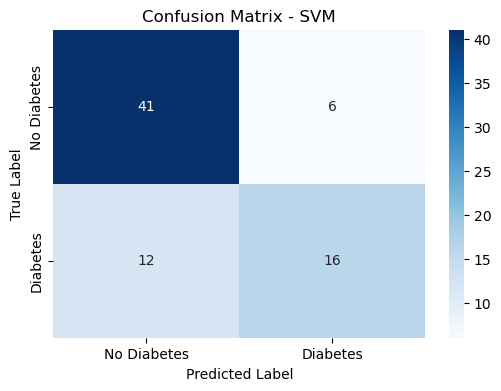

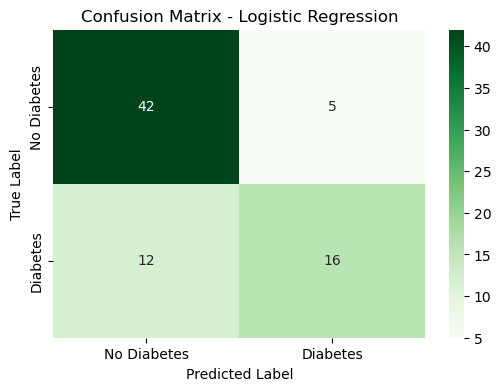

In [30]:
# Confusion Matrix for SVM
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


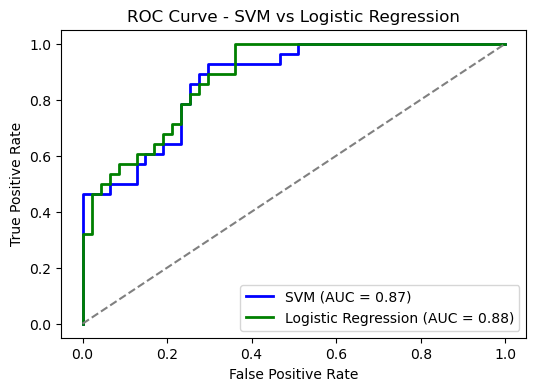

In [31]:
# Compute ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm.decision_function(X_test))
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_lr, tpr_lr, _ = roc_curve(y_test, best_lr.predict_proba(X_test)[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM vs Logistic Regression")
plt.legend()
plt.show()


In [32]:
import joblib

# Save the best model
if accuracy_lr > accuracy_svm:
    joblib.dump(best_lr, "best_diabetes_model.pkl")
    print("Best Model (Logistic Regression) Saved!")
else:
    joblib.dump(best_svm, "best_diabetes_model.pkl")
    print("Best Model (SVM) Saved!")


Best Model (Logistic Regression) Saved!


In [33]:
import pickle

# Save the trained Logistic Regression model
with open("model.pkl", "wb") as model_file:
    pickle.dump(best_lr, model_file)  # Replace `best_model` with your trained model variable


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Load cleaned dataset
df = pd.read_csv("diabetes_cleaned.csv")  

# Features & Target
features = ["Insulin", "BMI", "Age", "BloodPressure"]  
target = "Glucose"

X = df[features]
y = df[target]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "R² Score": r2}
    
    print(f"📌 {name} - MSE: {mse:.4f}, R² Score: {r2:.4f}")


📌 Linear Regression - MSE: 650.8529, R² Score: 0.0692
📌 Random Forest - MSE: 771.3605, R² Score: -0.1031
📌 XGBoost - MSE: 873.6478, R² Score: -0.2494


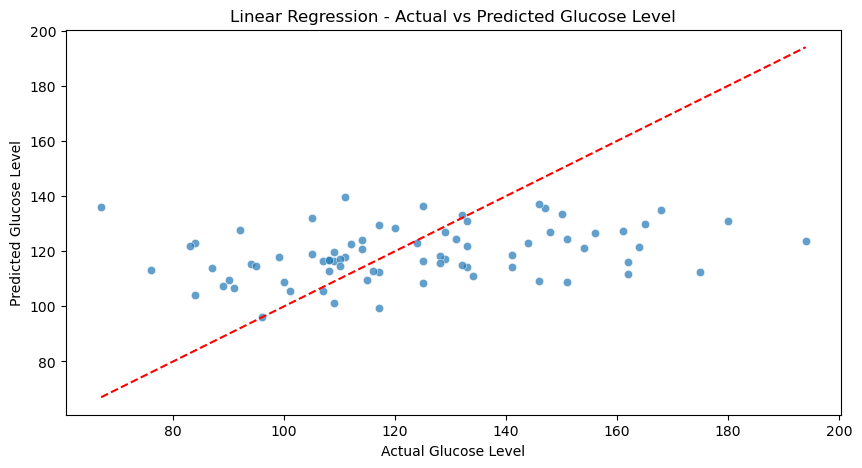

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Best Model Selection
best_model_name = max(results, key=lambda x: results[x]["R² Score"])
best_model = models[best_model_name]
y_pred = best_model.predict(X_test_scaled)

# Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Perfect prediction line
plt.xlabel("Actual Glucose Level")
plt.ylabel("Predicted Glucose Level")
plt.title(f"{best_model_name} - Actual vs Predicted Glucose Level")
plt.show()


In [36]:
import joblib

# Save Best Model
joblib.dump(best_model, "glucose_forecast_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model Saved Successfully!")


✅ Model Saved Successfully!
